# Packages Loading

In [3]:
# for Data Engineering and Data Visualization
import pandas as pd
import numpy as np 
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# For Statistics 

from scipy.stats import pearsonr
# for standarization 
from sklearn.preprocessing import StandardScaler
# for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Load Data

In [5]:
data = pd.read_csv("dataset/AmesHousing.tsv", delimiter="\t")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
print(data.shape)
print(data.dtypes.value_counts())

(2930, 82)
object     43
int64      28
float64    11
Name: count, dtype: int64


# Features Engineering

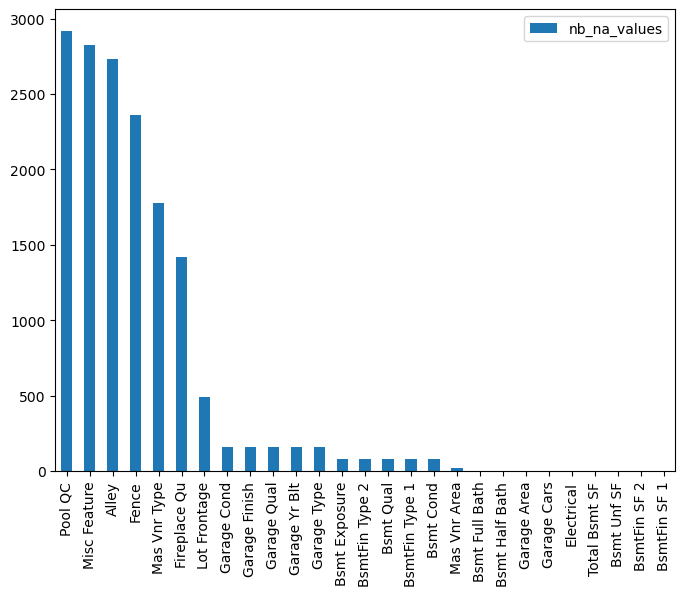

In [7]:
# Founction that return the NA values per variables
def count_na_values_function(data): 
    count_na_values =pd.DataFrame(data.isnull().sum(), columns= ["nb_na_values"])\
                .sort_values(by = "nb_na_values", ascending=False)
    return count_na_values

# Call function
count_na_values = count_na_values_function(data)
count_na_values= count_na_values[count_na_values["nb_na_values"]>0]
count_na_values.plot(kind = "bar", figsize = (8,6))
plt.show()

In [9]:
# Norminal Variables
columns_removed = ["PID","Order", "Mo Sold",
                   "Sale Condition", "Sale Type",
                   "Year Built", "Year Remod/Add", "Yr Sold"]



In [11]:
# Data Engineering function
def transform_features (data,nominal_columns, missing_percent): 
    # First step remove the unnecessary columns 
    data = data.drop(nominal_columns, axis =1)
    # Count the NA values in dataset
    count_na_values = count_na_values_function(data) # Call function for to count the NA values
    #Delete all variables with more than 5% missing values
    columns_removed =  count_na_values[count_na_values["nb_na_values"] > len(data)* missing_percent].index
    data = data.drop(columns_removed, axis =1)

    # Replace the missing values 
        ## For numerical columns
    missing_values_num = data.select_dtypes(include = ["int64", "float64"]).isnull().sum()
    missing_values_num_col= missing_values_num[missing_values_num>0].index
    data[missing_values_num_col] = data[missing_values_num_col].apply(lambda x : x.fillna(x.mean))
        ## For categorial columns 
    missing_values_cat = data.select_dtypes(include = ["object"]).isnull().sum()
    missing_values_cat = missing_values_cat[missing_values_cat> 0].index
    data[missing_values_cat] = data[missing_values_cat].apply(lambda x: x.fillna(x.mode))
    
    return data

In [13]:
# Call function
dataset = transform_features(data, nominal_columns=columns_removed, missing_percent=0.05)
print(count_na_values_function(dataset))

              nb_na_values
MS SubClass              0
MS Zoning                0
Lot Area                 0
Street                   0
Lot Shape                0
...                    ...
3Ssn Porch               0
Screen Porch             0
Pool Area                0
Misc Val                 0
SalePrice                0

[62 rows x 1 columns]


In [15]:
dataset.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,528.0,P,210,62,0,0,0,0,0,215000
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,730.0,Y,140,0,0,0,120,0,0,105000
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,312.0,Y,393,36,0,0,0,0,12500,172000
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,522.0,Y,0,0,0,0,0,0,0,244000
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,482.0,Y,212,34,0,0,0,0,0,189900


# Statistics 

In [17]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
MS SubClass,2930.0,57.387372,42.638025,20.0,20.00,50.0,70.00,190.0
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
1st Flr SF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0
2nd Flr SF,2930.0,335.455973,428.395715,0.0,0.00,0.0,703.75,2065.0
Low Qual Fin SF,2930.0,4.676792,46.310510,0.0,0.00,0.0,0.00,1064.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.00,1442.0,1742.75,5642.0
Full Bath,2930.0,1.566553,0.552941,0.0,1.00,2.0,2.00,4.0
Half Bath,2930.0,0.379522,0.502629,0.0,0.00,0.0,1.00,2.0


# Standarization

In [74]:
# Select numerical variables
dataset_numerical_col = dataset.select_dtypes(include=["int64", "float64"])
dataset_numerical_col.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [76]:
df = dataset_numerical_col
target_col = "SalePrice"
features = list(df.columns)
for col in features: 
    if col != target_col and df[col].max() > 10: 
        df[col] = (df[col] - df[col].mean())/ df[col].std()

In [168]:
# Pearson test
pearsonr(df["MS SubClass"], df["Screen Porch"])

PearsonRResult(statistic=-0.05061399736335951, pvalue=0.0061383800408267575)

#  Pearson Correlation between the variables

In [84]:
# Pvalues of test result between variables
def pearson_statistics_test(df): 
    matrice = np.empty((len(df.columns), len(df.columns),))
    # Replace all values per NA values 
    matrice[:] = np.nan
    #col = dataset_numeric_col.columns
    for i in range(0, len(df.columns)): 
        for j in range(0,len(df.columns)): 
            #matrices[i,j] = pearsonr(dataset_numerical_col.iloc[:,i], dataset_numerical_col.iloc[:,j])
            matrice[i,j] = pearsonr(df.iloc[:,i], df.iloc[:,j])[1]
    # Create a dataframe to save the pvalues 
    df_pvalue = round(pd.DataFrame(matrice, columns= df.columns, index = df.columns),5)
    return df_pvalue

In [90]:
# Call function 
df_pvalue = pearson_statistics_test(df)
df_pvalue

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,...,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
MS SubClass,0.00000,0.00000,0.03287,0.00026,0.00000,0.00000,0.16323,0.00023,0.00000,0.00000,...,0.08429,0.00684,0.34894,0.42253,0.21596,0.03994,0.00614,0.85259,0.11338,0.00000
Lot Area,0.00000,0.00000,0.00000,0.05994,0.00000,0.07413,0.96495,0.00000,0.00000,0.05470,...,0.00000,0.00000,0.00000,0.00000,0.23667,0.37945,0.00288,0.00000,0.00018,0.00000
Overall Qual,0.03287,0.00000,0.00000,0.00000,0.00000,0.00000,0.00840,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.32364,0.02428,0.09993,0.77931,0.00000
Overall Cond,0.00026,0.05994,0.00000,0.00000,0.00000,0.73653,0.61960,0.00000,0.00000,0.00000,...,0.00000,0.08621,0.27096,0.00019,0.00011,0.01761,0.01709,0.36369,0.06530,0.00000
1st Flr SF,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49235,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00037,0.01707,0.00000,0.00000,0.00000,0.00000
2nd Flr SF,0.00000,0.07413,0.00000,0.73653,0.00000,0.00000,0.32941,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00269,0.08165,0.52526,0.01576,0.78351,0.00000
Low Qual Fin SF,0.16323,0.96495,0.00840,0.61960,0.49235,0.32941,0.00000,0.00000,0.88786,0.03339,...,0.00000,0.70705,0.39721,0.96714,0.00000,0.80740,0.70717,0.05676,0.74794,0.04151
Gr Liv Area,0.00023,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.82738,0.72584,0.00000,0.00000,0.00027,0.00000
Full Bath,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.88786,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.40363,0.41296,0.12692,0.59702,0.00000
Half Bath,0.00000,0.05470,0.00000,0.00000,0.00000,0.00000,0.03339,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00001,0.20871,0.05143,0.93467,0.14927,0.00000


# Heatmap

In [94]:
cm = sns.light_palette("green",as_cmap= True)
df_pvalue.\
style.background_gradient(cmap=cm)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
MS SubClass,0.000000,0.000000,0.032870,0.000260,0.000000,0.000000,0.163230,0.000230,0.000000,0.000000,0.298630,0.000000,0.084290,0.006840,0.348940,0.422530,0.215960,0.039940,0.006140,0.852590,0.113380,0.000000
Lot Area,0.000000,0.000000,0.000000,0.059940,0.000000,0.074130,0.964950,0.000000,0.000000,0.054700,0.000000,0.271990,0.000000,0.000000,0.000000,0.000000,0.236670,0.379450,0.002880,0.000000,0.000180,0.000000
Overall Qual,0.032870,0.000000,0.000000,0.000000,0.000000,0.000000,0.008400,0.000000,0.000000,0.000000,0.000610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323640,0.024280,0.099930,0.779310,0.000000
Overall Cond,0.000260,0.059940,0.000000,0.000000,0.000000,0.736530,0.619600,0.000000,0.000000,0.000000,0.739830,0.000000,0.000000,0.086210,0.270960,0.000190,0.000110,0.017610,0.017090,0.363690,0.065300,0.000000
1st Flr SF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492350,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000,0.000370,0.017070,0.000000,0.000000,0.000000,0.000000
2nd Flr SF,0.000000,0.074130,0.000000,0.736530,0.000000,0.000000,0.329410,0.000000,0.000000,0.000000,0.000000,0.000170,0.000000,0.000000,0.000000,0.000000,0.002690,0.081650,0.525260,0.015760,0.783510,0.000000
Low Qual Fin SF,0.163230,0.964950,0.008400,0.619600,0.492350,0.329410,0.000000,0.000000,0.887860,0.033390,0.000130,0.977680,0.000000,0.707050,0.397210,0.967140,0.000000,0.807400,0.707170,0.056760,0.747940,0.041510
Gr Liv Area,0.000230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.827380,0.725840,0.000000,0.000000,0.000270,0.000000
Full Bath,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.887860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403630,0.412960,0.126920,0.597020,0.000000
Half Bath,0.000000,0.054700,0.000000,0.000000,0.000000,0.000000,0.033390,0.000000,0.000000,0.000000,0.000000,0.021970,0.000000,0.000000,0.000000,0.000000,0.000010,0.208710,0.051430,0.934670,0.149270,0.000000


# Correlation between the variables and target variable, SalePrice

In [96]:
abs_corr_coeffs = df.corr()["SalePrice"].abs().sort_values( ascending = False)
#Select variables whose correlation coefficient is greater than 0.4
abs_corr_coeffs_selected = abs_corr_coeffs[abs_corr_coeffs > 0.4]
abs_corr_coeffs_selected

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
1st Flr SF       0.621676
Full Bath        0.545604
TotRms AbvGrd    0.495474
Fireplaces       0.474558
Name: SalePrice, dtype: float64

# Simple Linear Regression

In [98]:
def train_test_model (df, col_selected, target_col): 
    ## select features 
    feats = np.array(df[col_selected], dtype = "float64").reshape(-1,1)
    target = df[target_col]
    # Separate data
    X_train, X_test, y_train, y_test = train_test_split(feats , target, test_size= 0.25, random_state=42)
    # Model instance 
    regressor = LinearRegression()
    # Train model 
    regressor.fit(X_train, y_train) 
    # predicton with the test data
    y_pred_test = regressor.predict(X_test)
    # Prediction with the train data
    y_pred_train = regressor.predict(X_train)
    # The coefficient of the model 
    coeffs = regressor.coef_[0]
    intercept = regressor.intercept_
    # calcul of metrics 
    R2_train = regressor.score(X_train, y_train) 
    R2_test = regressor.score(X_test, y_test)
    # Les metrics sur les données de decison 
        # train data
    mae_train = mean_absolute_error(y_train, y_pred_train) 
    mse_train = root_mean_squared_error(y_train, y_pred_train) 
    rmse_train = np.sqrt(root_mean_squared_error(y_train, y_pred_train))
            # the test data 
    mae_test = mean_absolute_error(y_test, y_pred_test) 
    mse_test = root_mean_squared_error(y_test, y_pred_test) 
    mse_test = np.sqrt(root_mean_squared_error(y_test, y_pred_test))
    # return the result 
    result = {"coeffs" : coeffs, 
              "intercept" : intercept, 
              "R2_train" : R2_train, 
              "R2_test" : R2_test, 
              "mae_train" : mae_train, 
              "mse_train" : mse_train, 
              "rmse_train" : rmse_train, 
              "mae_test" : mae_test, 
              "mse_test": mse_test, 
                "mse_test": mse_test

    }
    # return the result 
    return result

## Call function

In [102]:
feats = df.drop("SalePrice", axis = 1)

dict_of_result = {}
num_col = df.columns
for col in feats.columns: 
    dict_of_result[col] =  train_test_model(df, col, "SalePrice")

# Create a dictionary
model_result = pd.DataFrame(dict_of_result).T
model_result = model_result.sort_values(by =["R2_test"], ascending = False)
display(model_result)
# Select top features 
top_model_result = model_result[model_result["R2_test"] >0.2]["R2_test"]

,coeffs,intercept,R2_train,R2_test,mae_train,mse_train,rmse_train,mae_test,mse_test
Overall Qual,44347.051113,-89962.574981,0.631553,0.654149,33277.318572,47268.059554,217.412188,34746.066605,224.081189
Gr Liv Area,53982.353035,179287.741788,0.489707,0.516969,37770.290769,55627.554141,235.854943,40178.419922,243.599680
1st Flr SF,47840.616552,179333.784230,0.368589,0.425081,45241.661682,61878.020309,248.752930,47471.291098,254.439621
Full Bath,76224.044920,60098.984966,0.292688,0.304642,44439.143961,65491.625490,255.913316,47985.359848,266.830298
TotRms AbvGrd,37300.597384,179350.421913,0.230494,0.275188,48404.062014,68310.316673,261.362424,52022.020967,269.612027
Fireplaces,55585.135629,145923.164463,0.218205,0.235546,49258.841566,68853.601466,262.399698,52782.531276,273.225290
Open Porch SF,22581.395228,178978.592884,0.087094,0.115521,52215.875590,74403.486059,272.770024,55742.466430,283.370623
Wood Deck SF,25818.681511,178811.295693,0.108412,0.096957,53158.752404,73529.650278,271.163512,57807.426988,284.846018
Lot Area,19357.235000,179070.579414,0.067479,0.071696,54229.240920,75198.593559,274.223620,59565.947338,286.817459
Half Bath,44907.635365,162346.506268,0.083473,0.070111,53889.092028,74550.906883,273.040120,59141.686582,286.939815


# Mutltiple Linear Regression

# Features selection

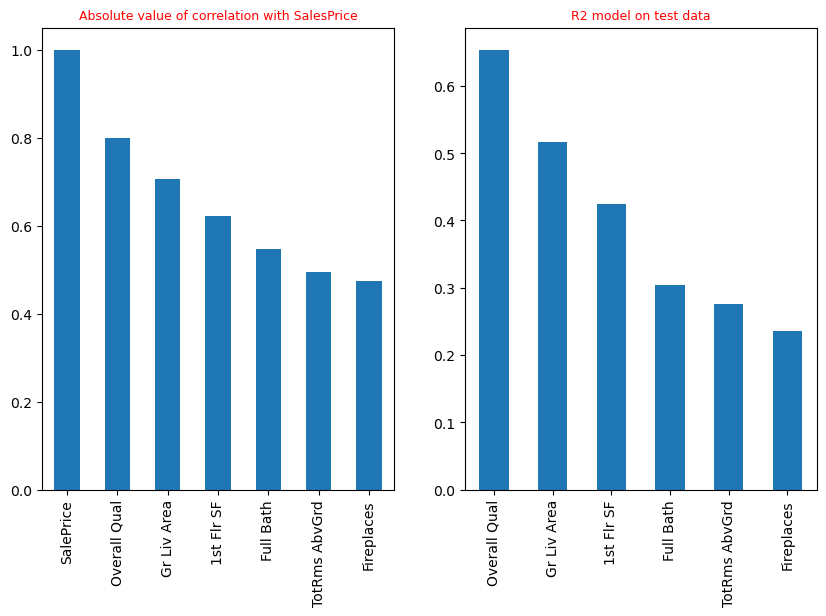

In [104]:
plt.figure(figsize=(10,6))
plt.subplot(121)
abs_corr_coeffs_selected.plot(kind = "bar")
plt.title("Absolute value of correlation with SalesPrice", size = 9, color = "red")

plt.subplot(122)
top_model_result.plot(kind = "bar")
plt.title("R2 model on test data", size = 9, color = "red")
plt.show()

# Select features and run Mutliple linear regression

In [126]:
# Select values based on R2 
dataset_num = df[abs_corr_coeffs_selected.index]
dataset_num.head()

,SalePrice,Overall Qual,Gr Liv Area,1st Flr SF,Full Bath,TotRms AbvGrd,Fireplaces
0,215000,6,0.309212,1.266787,1,0.354106,2
1,105000,5,-1.194223,-0.672528,1,-0.917378,0
2,172000,6,-0.337661,0.432371,1,-0.281636,0
3,244000,7,1.207317,2.425273,2,0.989849,2
4,189900,5,0.255801,-0.590873,2,-0.281636,1


In [108]:
df.describe()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,...,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
count,2.930000e+03,2.930000e+03,2930.000000,2930.000000,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2930.000000,2930.000000,...,2.930000e+03,2930.000000,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2930.000000
mean,-2.061301e-17,6.062651e-17,6.094881,5.563140,2.546314e-17,2.546314e-17,-9.093977e-18,4.971374e-17,1.566553,0.379522,...,-2.522063e-16,0.599317,-5.092627e-17,-6.183904e-17,3.880097e-17,1.455036e-17,4.668242e-17,9.700242e-18,-9.700242e-18,180796.060068
std,1.000000e+00,1.000000e+00,1.411026,1.111537,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.552941,0.502629,...,1.000000e+00,0.647921,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,79886.692357
min,-8.768552e-01,-1.122830e+00,1.000000,1.000000,-2.106601e+00,-7.830517e-01,-1.009877e-01,-2.305974e+00,0.000000,0.000000,...,-2.824605e+00,0.000000,-7.419335e-01,-7.043724e-01,-3.587768e-01,-1.031167e-01,-2.853057e-01,-6.302029e-02,-8.940702e-02,12789.000000
25%,-8.768552e-01,-3.436124e-01,5.000000,5.000000,-7.229249e-01,-7.830517e-01,-1.009877e-01,-7.392361e-01,1.000000,0.000000,...,-9.173783e-01,0.000000,-7.419335e-01,-7.043724e-01,-3.587768e-01,-1.031167e-01,-2.853057e-01,-6.302029e-02,-8.940702e-02,129500.000000
50%,-1.732578e-01,-9.028176e-02,6.000000,5.000000,-1.928028e-01,-7.830517e-01,-1.009877e-01,-1.141235e-01,2.000000,0.000000,...,-2.816360e-01,1.000000,-7.419335e-01,-3.042740e-01,-3.587768e-01,-1.031167e-01,-2.853057e-01,-6.302029e-02,-8.940702e-02,160000.000000
75%,2.958070e-01,1.785945e-01,7.000000,6.000000,5.727164e-01,8.597052e-01,-1.009877e-01,4.808215e-01,2.000000,1.000000,...,3.541063e-01,1.000000,5.875847e-01,3.329197e-01,-3.587768e-01,-1.031167e-01,-2.853057e-01,-6.302029e-02,-8.940702e-02,213500.000000
max,3.110196e+00,2.602749e+01,10.000000,9.000000,1.004219e+01,4.037258e+00,2.287436e+01,8.194336e+00,4.000000,2.000000,...,5.440045e+00,4.000000,1.052732e+01,1.029092e+01,1.541944e+01,2.010266e+01,9.984386e+00,2.241067e+01,2.992767e+01,755000.000000


# Scatter plot visualization

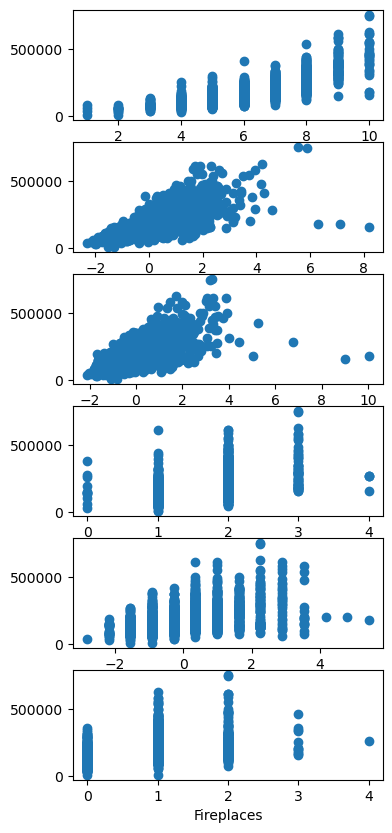

In [118]:
features_names = dataset_num.drop("SalePrice", axis = 1).columns
fig, axes = plt.subplots(6,1, figsize=(4,10))
for i in range(0,len(features_names)): 
    for j in range(1):
        #print(dataset[features_names[i]])
        axes[i].scatter(dataset_num[features_names[i]], dataset_num["SalePrice"])
    axes[i].set_xlabel(features_names[i])
    

# Correlation between the variables

,SalePrice,Overall Qual,Gr Liv Area,1st Flr SF,Full Bath,TotRms AbvGrd,Fireplaces
SalePrice,1.000000,0.799262,0.706780,0.621676,0.545604,0.495474,0.474558
Overall Qual,0.799262,1.000000,0.570556,0.477837,0.522263,0.380693,0.393007
Gr Liv Area,0.706780,0.570556,1.000000,0.562166,0.630321,0.807772,0.454924
1st Flr SF,0.621676,0.477837,0.562166,1.000000,0.371584,0.390162,0.406345
Full Bath,0.545604,0.522263,0.630321,0.371584,1.000000,0.528599,0.229793
TotRms AbvGrd,0.495474,0.380693,0.807772,0.390162,0.528599,1.000000,0.302865
Fireplaces,0.474558,0.393007,0.454924,0.406345,0.229793,0.302865,1.000000


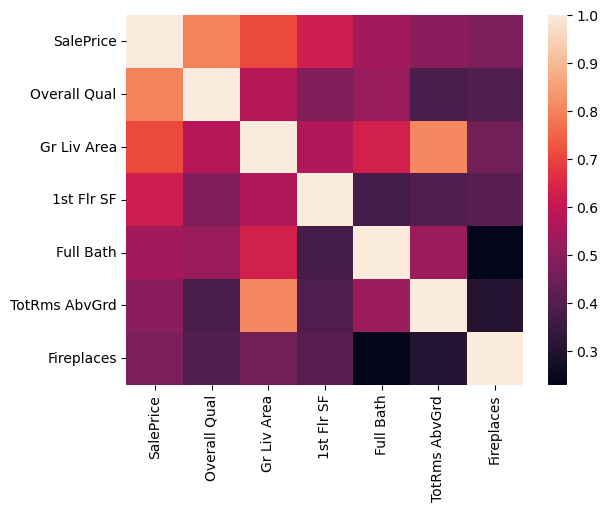

In [128]:
corr = dataset_num.corr()
sns.heatmap(corr)
display(corr)

# Train and test Linear Multiple Model

In [130]:
def multiple_linear_regressor (df, col_selected, target_col): 
    ## select features 
    feats = df[col_selected]
    target = df[target_col]
    # Separate data
    X_train, X_test, y_train, y_test = train_test_split(feats , target, test_size= 0.25, random_state=42)
    # Model instance 
    regressor = LinearRegression()
    # Train model 
    regressor.fit(X_train, y_train) 
    # predicton with the test data
    y_pred_test = regressor.predict(X_test)
    # Prediction with the train data
    y_pred_train = regressor.predict(X_train)
    # The coefficient of the model 
    coeffs = regressor.coef_
    intercept = regressor.intercept_
    # calcul of metrics 
    R2_train = regressor.score(X_train, y_train) 
    R2_test = regressor.score(X_test, y_test)
    # Les metrics sur les données de decison 
        # train data
    mae_train = mean_absolute_error(y_train, y_pred_train) 
    mse_train = root_mean_squared_error(y_train, y_pred_train) 
    rmse_train = np.sqrt(root_mean_squared_error(y_train, y_pred_train))
            # the test data 
    mae_test = mean_absolute_error(y_test, y_pred_test) 
    mse_test = root_mean_squared_error(y_test, y_pred_test) 
    mse_test = np.sqrt(root_mean_squared_error(y_test, y_pred_test))
    # return the result 
    result = {"coeffs" : coeffs, 
              "intercept" : intercept, 
              "R2_train" : R2_train, 
              "R2_test" : R2_test, 
              "mae_train" : mae_train, 
              "mse_train" : mse_train, 
              "rmse_train" : rmse_train, 
              "mae_test" : mae_test, 
              "mse_test": mse_test, 
                "mse_test": mse_test,

              "y_pred" : y_pred_test, 
              "y_test" : y_test

    }
    # return the result 
    return result

In [132]:
model_multiple_linear_regressor = multiple_linear_regressor(dataset_num, features_names, "SalePrice")
model_multiple_linear_regressor

{'coeffs': array([28775.42573702, 25337.11765426, 13425.83416257,  5265.69401017,
        -6610.4120157 ,  8121.99760711]),
 'intercept': -8431.041993560735,
 'R2_train': 0.7543384600854933,
 'R2_test': 0.7821576206648755,
 'mae_train': 26341.18220990599,
 'mse_train': 38596.58506787744,
 'rmse_train': 196.460136078232,
 'mae_test': 26173.542213332064,
 'mse_test': 199.62667869696858,
 'y_pred': array([ 2.29967459e+05,  1.25005695e+05,  2.04237288e+05,  8.66450022e+04,
         1.38204794e+05,  1.73611084e+05,  2.08480657e+05,  1.67910381e+05,
         6.67145217e+04,  2.88554688e+05,  2.49730062e+05,  2.39486474e+05,
         7.65464002e+04,  1.61946793e+05,  9.10889518e+04,  1.52334389e+05,
         1.76315163e+05,  1.94051363e+05,  1.15436965e+05,  1.45393727e+05,
         1.93948398e+05,  1.42904485e+05,  1.86249849e+05,  2.15499836e+05,
         2.10845545e+05,  2.74416768e+05,  3.30451543e+05,  2.21393671e+05,
         2.30526611e+05,  2.10993383e+05,  1.96169675e+05,  6.40376103

# Display coefficients in an array

In [134]:
coeff = list(model_multiple_linear_regressor["coeffs"])
coeff.insert(0,model_multiple_linear_regressor["intercept"])
feat = features_names.insert(0, "intercept")
## Create a dataframe to show a coeff for earch variable 
equation = pd.DataFrame({"Coeffs": coeff}, index = feat)
display(equation)

,Coeffs
intercept,-8431.041994
Overall Qual,28775.425737
Gr Liv Area,25337.117654
1st Flr SF,13425.834163
Full Bath,5265.694010
TotRms AbvGrd,-6610.412016
Fireplaces,8121.997607


# Difference between the actual value and  predicted value

In [136]:
reg_model_diff = pd.DataFrame({'Actual value': model_multiple_linear_regressor["y_test"], 
                               'Predicted value': model_multiple_linear_regressor["y_pred"]})

display(reg_model_diff)

,Actual value,Predicted value
1357,161000,229967.458553
2367,116000,125005.695150
2822,196500,204237.288384
2126,123600,86645.002207
1544,126000,138204.794482
...,...,...
2521,170000,233985.164539
707,80000,75759.838311
424,325000,303689.600033
69,262500,247210.884625


# Model Optimization

In [144]:
dataset_selected = dataset_num.drop("TotRms AbvGrd", axis = 1)
dataset_selected.head()

,SalePrice,Overall Qual,Gr Liv Area,1st Flr SF,Full Bath,Fireplaces
0,215000,6,0.309212,1.266787,1,2
1,105000,5,-1.194223,-0.672528,1,0
2,172000,6,-0.337661,0.432371,1,0
3,244000,7,1.207317,2.425273,2,2
4,189900,5,0.255801,-0.590873,2,1


In [166]:
# Remove the columns 
features_names_selected = dataset_selected.columns[2:]

result_multiple_linear_regressor = multiple_linear_regressor(dataset_selected, 
                                                             features_names_selected, 
                                                             "SalePrice")
result_multiple_linear_regressor

{'coeffs': array([28343.35497778, 21590.16653617, 24880.23830252, 17902.45726251]),
 'intercept': 129796.43997133659,
 'R2_train': 0.5892760340662145,
 'R2_test': 0.6376533906425079,
 'mae_train': 33603.16984188223,
 'mse_train': 49906.29375167519,
 'rmse_train': 223.39716594369588,
 'mae_test': 33841.59871367127,
 'mse_test': 226.70653474397946,
 'y_pred': array([163913.12797611,  91674.5289264 , 190557.87381241, 116757.54687371,
        108865.09844777, 178987.96364265, 120092.38423678, 178230.91615768,
         84965.43067909, 273863.54986232, 257250.1368468 , 173677.60128417,
         98015.60323736, 223674.78430782, 182712.88912517, 140218.06640801,
        177345.92238355, 170832.88673285, 122315.6091455 , 123871.8665816 ,
        167871.83909907, 152723.53928356, 199970.44309816, 200635.45724232,
        194573.75104129, 248786.03494814, 252248.72113216, 211230.22156637,
        220899.43292508, 190326.4106771 , 162710.30250224,  82463.19461265,
        194550.53800365, 121157.4

In [160]:
coeff = list(result_multiple_linear_regressor["coeffs"])
coeff.insert(0,result_multiple_linear_regressor["intercept"])
feat = features_names_selected.insert(0, "intercept")
## Create a dataframe to show a coeff for earch variable 
equation = pd.DataFrame({"Coeffs": coeff}, index = feat)
display(equation)

,Coeffs
intercept,129796.439971
Gr Liv Area,28343.354978
1st Flr SF,21590.166536
Full Bath,24880.238303
Fireplaces,17902.457263


In [162]:
reg_model_diff = pd.DataFrame({'Actual value': result_multiple_linear_regressor["y_test"], 
                               'Predicted value': result_multiple_linear_regressor["y_pred"]})

display(reg_model_diff)

,Actual value,Predicted value
1357,161000,163913.127976
2367,116000,91674.528926
2822,196500,190557.873812
2126,123600,116757.546874
1544,126000,108865.098448
...,...,...
2521,170000,160894.058059
707,80000,102417.746212
424,325000,251031.444180
69,262500,205666.662547
